In [75]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [76]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [77]:
NUM_CLASSES = 67

# Dataset reading

In [78]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [79]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [81]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [83]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [84]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 90)                7830      
                                                                 
 dropout_6 (Dropout)         (None, 90)                0         
                                                                 
 dense_13 (Dense)            (None, 120)               10920     
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                6050      
                                                                 
 dense_15 (Dense)            (None, 67)                3417      
                                                                 
Total params: 28217 (110.22 KB)
Trainable params: 2821

In [85]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [86]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [87]:
model.fit(
    X_train,
    y_train,
    epochs=50*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3350
42/47 [=========================>....] - ETA: 0s - loss: 4.0230 - accuracy: 0.0664
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 3s 23ms/step - loss: 3.9934 - accuracy: 0.0666 - val_loss: 3.5434 - val_accuracy: 0.0766
Epoch 2/3350
 7/47 [===>..........................] - ETA: 0s - loss: 3.5397 - accuracy: 0.1105

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/47 [=========================>....] - ETA: 0s - loss: 3.2709 - accuracy: 0.1360
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 3.2279 - accuracy: 0.1425 - val_loss: 2.6190 - val_accuracy: 0.2474
Epoch 3/3350
46/47 [============================>.] - ETA: 0s - loss: 2.5759 - accuracy: 0.2376
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 2.5724 - accuracy: 0.2385 - val_loss: 2.0721 - val_accuracy: 0.4101
Epoch 4/3350
47/47 [==============================] - ETA: 0s - loss: 2.1739 - accuracy: 0.3175
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 2.1739 - accuracy: 0.3175 - val_loss: 1.6982 - val_accuracy: 0.5744
Epoch 5/3350
46/47 [============================>.] - ETA: 0s - loss: 1.8364 - accuracy: 0.4136
Epoch 5: sa

42/47 [=========================>....] - ETA: 0s - loss: 0.4225 - accuracy: 0.8503
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.4245 - accuracy: 0.8520 - val_loss: 0.3018 - val_accuracy: 0.9134
Epoch 30/3350
46/47 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8592
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.3992 - accuracy: 0.8592 - val_loss: 0.2661 - val_accuracy: 0.9314
Epoch 31/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.4003 - accuracy: 0.8588
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.3985 - accuracy: 0.8587 - val_loss: 0.2540 - val_accuracy: 0.9279
Epoch 32/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.3828 - accuracy: 0.8646
Epoch

Epoch 56/3350
47/47 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.9223
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.2140 - accuracy: 0.9223 - val_loss: 0.1518 - val_accuracy: 0.9579
Epoch 57/3350
42/47 [=========================>....] - ETA: 0s - loss: 0.2103 - accuracy: 0.9256
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.2061 - accuracy: 0.9272 - val_loss: 0.1427 - val_accuracy: 0.9654
Epoch 58/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.2106 - accuracy: 0.9245
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.2118 - accuracy: 0.9232 - val_loss: 0.1446 - val_accuracy: 0.9675
Epoch 59/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.2022 - accuracy

Epoch 83/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1557 - accuracy: 0.9448
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.1537 - accuracy: 0.9454 - val_loss: 0.1033 - val_accuracy: 0.9850
Epoch 84/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1514 - accuracy: 0.9482
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.1485 - accuracy: 0.9489 - val_loss: 0.1156 - val_accuracy: 0.9680
Epoch 85/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1346 - accuracy: 0.9537
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.1365 - accuracy: 0.9526 - val_loss: 0.0982 - val_accuracy: 0.9820
Epoch 86/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1242 - accuracy

Epoch 110/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1011 - accuracy: 0.9678
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0988 - accuracy: 0.9688 - val_loss: 0.0849 - val_accuracy: 0.9890
Epoch 111/3350
46/47 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9660
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.1024 - accuracy: 0.9663 - val_loss: 0.0865 - val_accuracy: 0.9860
Epoch 112/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1077 - accuracy: 0.9638
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.1087 - accuracy: 0.9636 - val_loss: 0.0847 - val_accuracy: 0.9895
Epoch 113/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.1016 - a

Epoch 137/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.0911 - accuracy: 0.9735
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 0s 9ms/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0764 - val_accuracy: 0.9875
Epoch 138/3350
42/47 [=========================>....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9753
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 0s 7ms/step - loss: 0.0802 - accuracy: 0.9751 - val_loss: 0.0741 - val_accuracy: 0.9885
Epoch 139/3350
47/47 [==============================] - ETA: 0s - loss: 0.0799 - accuracy: 0.9746
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 12ms/step - loss: 0.0799 - accuracy: 0.9746 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 140/3350
47/47 [==============================] - ETA: 0s - loss: 0.0779 - acc

Epoch 164/3350
41/47 [=========================>....] - ETA: 0s - loss: 0.0554 - accuracy: 0.9832
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0695 - val_accuracy: 0.9920
Epoch 165/3350
42/47 [=========================>....] - ETA: 0s - loss: 0.0506 - accuracy: 0.9853
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0679 - val_accuracy: 0.9925
Epoch 166/3350
41/47 [=========================>....] - ETA: 0s - loss: 0.0622 - accuracy: 0.9796
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 14ms/step - loss: 0.0618 - accuracy: 0.9795 - val_loss: 0.0809 - val_accuracy: 0.9890
Epoch 167/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.0699 - a

Epoch 191/3350
46/47 [============================>.] - ETA: 0s - loss: 0.0496 - accuracy: 0.9827
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0494 - accuracy: 0.9826 - val_loss: 0.0732 - val_accuracy: 0.9930
Epoch 192/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.0618 - accuracy: 0.9789
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0624 - accuracy: 0.9781 - val_loss: 0.0837 - val_accuracy: 0.9900
Epoch 193/3350
47/47 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9831
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0676 - val_accuracy: 0.9925
Epoch 194/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.0523 - a

Epoch 218/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0436 - accuracy: 0.9866
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0660 - val_accuracy: 0.9920
Epoch 219/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0474 - accuracy: 0.9865
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0467 - accuracy: 0.9865 - val_loss: 0.0683 - val_accuracy: 0.9940
Epoch 220/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0483 - accuracy: 0.9837
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0476 - accuracy: 0.9840 - val_loss: 0.0664 - val_accuracy: 0.9940
Epoch 221/3350
43/47 [==========================>...] - ETA: 0s - loss: 0.0444 - a

Epoch 245/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.0442 - accuracy: 0.9858
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0645 - val_accuracy: 0.9935
Epoch 246/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.0508 - accuracy: 0.9842
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0598 - val_accuracy: 0.9925
Epoch 247/3350
44/47 [===========================>..] - ETA: 0s - loss: 0.0388 - accuracy: 0.9870
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0704 - val_accuracy: 0.9920
Epoch 248/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0444 - a

Epoch 272/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0520 - accuracy: 0.9832
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0525 - accuracy: 0.9831 - val_loss: 0.0704 - val_accuracy: 0.9950
Epoch 273/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0362 - accuracy: 0.9866
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0365 - accuracy: 0.9866 - val_loss: 0.0675 - val_accuracy: 0.9935
Epoch 274/3350
46/47 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9886
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 15ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0636 - val_accuracy: 0.9925
Epoch 275/3350
45/47 [===========================>..] - ETA: 0s - loss: 0.0452 - a

In [88]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 [==============================] - 0s 6ms/step - loss: 0.0665 - accuracy: 0.9925


In [89]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [90]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 183ms/step
[2.4001445e-10 3.5259667e-15 6.6454220e-08 4.1168920e-18 1.7845060e-11
 9.1851984e-09 2.0651349e-10 1.5594475e-16 1.1576756e-18 6.9691131e-27
 2.3023752e-17 3.7265999e-19 6.4714541e-08 1.1004127e-05 1.7885640e-08
 4.0903032e-07 1.7056843e-22 4.4702113e-09 1.6795708e-06 5.5050396e-07
 1.8757181e-12 4.6036439e-05 3.9939419e-08 4.8076574e-14 5.5519017e-10
 5.3912976e-07 3.4033816e-15 1.7825653e-13 7.9443271e-06 3.7422739e-17
 7.5376254e-11 2.8495259e-09 2.5210102e-15 3.6676988e-11 5.1747228e-18
 5.5514361e-25 2.0887778e-09 1.4885159e-11 7.4494000e-10 4.4808101e-18
 9.9909246e-01 7.9889152e-25 2.1263030e-19 4.2886880e-10 1.0867713e-20
 6.1435556e-21 4.9941590e-22 2.5221492e-12 1.3207691e-06 4.1679753e-09
 1.3325952e-15 8.3766581e-04 2.4313049e-14 4.8657238e-09 6.8731647e-13
 3.0048186e-20 1.0668506e-18 8.1435634e-17 6.4661702e-24 4.3977502e-25
 5.0636578e-23 4.0102227e-16 3.0806255e-09 5.6926720e-11 2.7009278e-07
 1.9113441e-10 1.7257370

# Confusion matrix

63/63 [==============================] - 0s 3ms/step


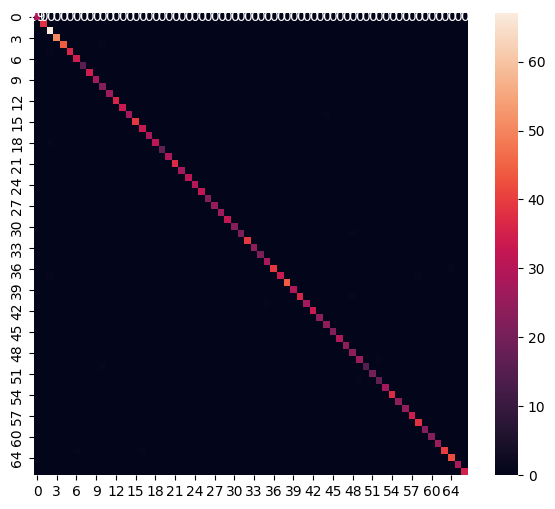

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        38
           2       0.96      1.00      0.98        67
           3       1.00      1.00      1.00        50
           4       1.00      0.98      0.99        45
           5       1.00      0.97      0.99        37
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        28
          10       0.92      1.00      0.96        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        33
          14       1.00      0.96      0.98        28
          15       1.00      1.00      1.00        39
          16       0.97      1.00      0.99        33
     

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [92]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [93]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpdxvll6f_\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpdxvll6f_\assets


31984

# Inference test

In [94]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [95]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [96]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [97]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 6.73 ms


In [98]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2142055e-10 9.2235993e-15 1.1631864e-07 8.6036255e-18 2.5531117e-11
 9.1308729e-09 2.3875829e-10 3.7190281e-16 3.1396273e-18 1.1796685e-26
 2.6549601e-17 2.7418589e-19 4.7603415e-08 1.1024335e-05 1.7006315e-08
 5.3465862e-07 4.2672427e-22 5.9513829e-09 2.3610457e-06 4.3613520e-07
 1.2122008e-12 7.0108450e-05 8.2262467e-08 6.2475050e-14 7.4224654e-10
 4.4157767e-07 1.0351913e-14 5.1983976e-13 7.9829897e-06 3.7895291e-17
 3.9654325e-11 2.4549507e-09 2.9820729e-15 3.1760899e-11 7.4654407e-18
 1.6829028e-24 2.8932565e-09 2.7076839e-11 8.7731850e-10 7.0352662e-18
 9.9824846e-01 1.3740797e-24 4.4352060e-19 8.7841023e-10 2.4581224e-20
 1.2992293e-20 2.5989197e-21 7.2121736e-12 1.0621220e-06 2.8826419e-09
 2.1262217e-15 1.6569525e-03 2.2335815e-14 1.1450562e-08 1.9670819e-12
 5.0614726e-20 6.9995248e-19 2.3520128e-16 1.4779289e-23 4.6016603e-25
 7.9482955e-23 5.3798281e-16 2.4118292e-09 3.6461941e-11 1.8430744e-07
 2.4417846e-10 4.0404509e-15]
40
